# Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

## Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

# **Lab | Numerical cleaning**

1. Import the necessary libraries.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# To make run all you ask in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
#additional libraries
import time
from datetime import time

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df.


In [3]:
customer_df = pd.read_csv('/Users/deshdeepak/lab-cleaning-numerical-data/files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

In [4]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


3. First look at its main features (head, shape, info).


In [6]:
customer_df.shape

(9134, 24)

In [8]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [9]:
customer_df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


4. Rename the columns so they follow the PE8 (snake case).


In [11]:
#checking column names by creating and inspecting the list
col_names = customer_df.columns.tolist()
col_names

['Customer',
 'State',
 'Customer Lifetime Value',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Income',
 'Location Code',
 'Marital Status',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Total Claim Amount',
 'Vehicle Class',
 'Vehicle Size']

In [16]:
#replacing spaces with underscore, and lowering the cases so it's easier to type later
customer_df.columns = customer_df.columns.str.replace(' ','_')
customer_df.columns = customer_df.columns.str.lower()


In [17]:
#checking if the above commands did their job, easy to see in a list so creating a list to view

col_names = customer_df.columns.tolist()
col_names

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

5. Change effective to date column to datetime format.


In [20]:
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'],errors='coerce')
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

6. Check NaN values per column.


In [23]:
#find null values
customer_df.isnull() #doesnt help much
customer_df.isnull().sum() #quite a lot, so maybe we can see the percentages
customer_df.isnull().sum()/len(customer_df) #checking in % format

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9131,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

No null values found, so we don't need to worry about dropping or replacing or predicting any values for now. 

7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.


In [25]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [30]:
#checking value_counts for float dtypes
customer_df['total_claim_amount'].value_counts()
customer_df['customer_lifetime_value'].value_counts()

316.800000     116
292.800000     110
312.000000     108
350.400000     105
331.200000     102
              ... 
480.073548       1
232.674417       1
424.711758       1
1272.546918      1
11.549207        1
Name: total_claim_amount, Length: 5106, dtype: int64

2248.449633     6
10972.067780    6
5619.689084     6
11981.984810    6
2530.705137     6
               ..
12349.702320    1
4046.936065     1
2121.313061     1
7232.609391     1
3297.904615     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

In [ ]:
#checking value_counts for int64 dtypes
customer_df['total_claim_amount'].value_counts()
customer_df['customer_lifetime_value'].value_counts()


In [35]:
#iterating over a loop to see unique values and their counts for all columns:
for i in range(len(col_names)):
    customer_df[col_names[i]].value_counts()
col_names

ZT52415    1
RT17851    1
ZW10467    1
MN95006    1
FB77856    1
          ..
YI68606    1
YR49519    1
AF69537    1
UE52886    1
HU41273    1
Name: customer, Length: 9134, dtype: int64

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: state, dtype: int64

2248.449633     6
10972.067780    6
5619.689084     6
11981.984810    6
2530.705137     6
               ..
12349.702320    1
4046.936065     1
2121.313061     1
7232.609391     1
3297.904615     1
Name: customer_lifetime_value, Length: 8041, dtype: int64

No     7826
Yes    1308
Name: response, dtype: int64

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

2011-01-10    195
2011-01-27    194
2011-02-14    186
2011-01-26    181
2011-01-17    180
2011-01-19    179
2011-01-03    178
2011-01-31    178
2011-01-20    173
2011-02-26    169
2011-01-28    169
2011-02-19    168
2011-02-27    167
2011-01-05    167
2011-01-11    166
2011-02-04    164
2011-02-28    161
2011-02-10    161
2011-01-21    160
2011-01-29    160
2011-01-02    160
2011-02-03    158
2011-02-22    158
2011-02-05    158
2011-02-07    157
2011-02-12    156
2011-01-23    155
2011-01-18    154
2011-02-01    154
2011-01-15    153
2011-01-14    152
2011-02-11    151
2011-01-25    151
2011-01-07    151
2011-01-08    149
2011-02-18    149
2011-02-02    149
2011-02-25    149
2011-01-01    148
2011-02-21    148
2011-01-24    147
2011-01-09    146
2011-01-30    145
2011-01-13    145
2011-02-06    144
2011-02-23    143
2011-01-06    143
2011-01-16    142
2011-02-13    139
2011-02-16    139
2011-02-24    139
2011-02-09    137
2011-01-22    136
2011-02-17    136
2011-02-08    134
2011-02-20

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: employmentstatus, dtype: int64

F    4658
M    4476
Name: gender, dtype: int64

0        2317
95697      12
26876       7
61108       7
25965       7
         ... 
36259       1
69011       1
38638       1
30092       1
51199       1
Name: income, Length: 5694, dtype: int64

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

Married     5298
Single      2467
Divorced    1369
Name: marital_status, dtype: int64

65     348
66     307
71     304
73     302
63     289
      ... 
147      1
290      1
273      1
298      1
205      1
Name: monthly_premium_auto, Length: 202, dtype: int64

3     381
6     364
1     345
4     335
7     333
2     329
0     314
5     313
10    306
11    297
16    295
15    286
13    285
8     279
12    273
14    268
17    263
9     250
19    246
23    239
25    236
21    233
20    231
18    229
22    218
24    211
29    206
28    201
31    190
26    186
30    182
27    182
33    179
34    169
35    142
32    138
Name: months_since_last_claim, dtype: int64

59    142
61    128
50    125
44    115
10    114
     ... 
16     70
96     67
82     56
98     54
97     52
Name: months_since_policy_inception, Length: 100, dtype: int64

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales_channel, dtype: int64

316.800000     116
292.800000     110
312.000000     108
350.400000     105
331.200000     102
              ... 
480.073548       1
232.674417       1
424.711758       1
1272.546918      1
11.549207        1
Name: total_claim_amount, Length: 5106, dtype: int64

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: vehicle_class, dtype: int64

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

['customer',
 'state',
 'customer_lifetime_value',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'income',
 'location_code',
 'marital_status',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'total_claim_amount',
 'vehicle_class',
 'vehicle_size']

**Findings (based on observations from above):**
1. customer:**discrete**, one value for each row as it matches with the shape we found earlier 9134 values for 9134 rows.
2. state: **discrete**, 5 different states.
3. customer_lifetime_value: perhaps **continuos**, we should check it later
4. response: **discrete**, binary: No|Yes
5. coverage: **discrete**, three options: Basic|Extended|Premium
6. education: **discrete**, education level: Bachelor|College|High school or below|Master|Doctor
7. effective_to_date: **discrete** or **continuous**, datetime format can be both discrete or continuous, requires further inspection
8. employment status: **discrete**, options: Employed|Unemployed|Medical Leave|Disabled|Retired
9. gender: **discrete**, binary: F|M
10. income: **continuous**
11. location_code: **discrete**, three options: Suburban|Rural|Urban
12. marital_status: **discrete**, three options: Marital|Single|Divorced
13. monthly_premium_auto: most likely **discrete**, do some further inspection
14. months_since_last_claim: most likely **discrete**, do some further inspection
15. months_since_policy_inception: most likely **discrete**, do some further inspection
16. number_of_open_complaints: **discrete**
17. number_of_policies: **discrete**
18. policy_type: **discrete**, three options: Personal Auto|Corporate Auto|Special Auto
19. policy: **discrete**, 9 options: Personal L1-3|Corporate L1-3|Special L1-3
20. renew_offer_type: **discrete**, 4 options: Offer1-4
21. sales_channel: **discrete**, 4 options: Agent|Branch|Call Center|Web
22. total_claim_amount:**continuous**
23. vehicle_class: **discrete**, 6 options: Four/Two-Door Car|SUV|Sports Car|Luxury SUV/Car
24. vehicle_size: **discrete**, 3 options: Medsize|Small|Large

In [40]:
#what we need then is:
numericals = pd.DataFrame(customer_df.select_dtypes(np.number))
categoricals = customer_df.select_dtypes(np.object)
numericals.head(2)
categoricals.head(2)

#splitting continuous and discrete variables

continuous = numericals[['customer_lifetime_value','income','monthly_premium_auto','total_claim_amount']]
discrete_num = numericals[['months_since_last_claim','months_since_policy_inception','number_of_open_complaints','number_of_policies']]
discrete_all = pd.concat([discrete,categoricals],axis=1)
#created two discrete variables for now(one for numericals, and other for all discrete variables), because categoricals can be treated as discrete as well. 
continuous.head(2)
discrete_num.head(2)
discrete_all.head(2)

<ipython-input-40-771b9f5f4727>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = customer_df.select_dtypes(np.object)


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,32,5,0,1
1,13,42,0,8


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer,state,response,coverage,education,employmentstatus,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,32,5,0,1,BU79786,Washington,No,Basic,Bachelor,Employed,...,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,13,42,0,8,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,...,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize


8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.


In [42]:
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [43]:
#i checked value_counts earlier so I am going to just refer to that

#values are okay, but we can make it easier for us by removing 'Auto' from policy_type, and change 'Offer1-4' to '1-4' in renew_offer_type.

#defining functions

def clean_policy(x):
    if 'Personal Auto' in x:
        return "Personal"
    elif 'Corporate Auto' in x:
        return "Corporate"
    else:
        return "Special"

def clean_offer(x):
    if 'Offer1' in x:
        return "1"
    elif 'Offer2' in x:
        return "2"
    elif 'Offer3' in x:
        return "3"
    else:
        return "4"

In [44]:
categoricals['policy_type'] = categoricals['policy_type'].apply(clean_policy)
categoricals['policy_type'].value_counts()

categoricals['renew_offer_type'] = categoricals['renew_offer_type'].apply(clean_offer)
categoricals['renew_offer_type'].value_counts()

<ipython-input-44-a78eb6c3beed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals['policy_type'] = categoricals['policy_type'].apply(clean_policy)


Personal     6788
Corporate    1968
Special       378
Name: policy_type, dtype: int64

<ipython-input-44-a78eb6c3beed>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals['renew_offer_type'] = categoricals['renew_offer_type'].apply(clean_offer)


1    3752
2    2926
3    1432
4    1024
Name: renew_offer_type, dtype: int64

9. Get categorical features.


In [45]:
#our main goal is to predict total_claim_amount so all categorical columns will be features.

#I have already assigned them to categoricals variable.

categoricals.head()


,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate,Corporate L3,1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal,Personal L3,3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal,Personal L3,1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate,Corporate L2,1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal,Personal L1,1,Agent,Four-Door Car,Medsize


10. What should we do with the customer_id column?

In [49]:
#customer_id doesn't exist, but assuming the question means customer column.

customer_df['customer'].unique()
customer_df['customer'].value_counts()

array(['BU79786', 'QZ44356', 'AI49188', ..., 'TD14365', 'UP19263',
       'Y167826'], dtype=object)

ZT52415    1
RT17851    1
ZW10467    1
MN95006    1
FB77856    1
          ..
YI68606    1
YR49519    1
AF69537    1
UE52886    1
HU41273    1
Name: customer, Length: 9134, dtype: int64

In [52]:
#these are most likely license plates of customers for their vehicles.
#this is no different than having customer names in this column
#i would keep it as it is, if we were trying to see individual behavior of the customer

However, we are not concerned with individual behavour, for that we could just query them and retrieve what historical data we have on them. For our purposes, it would be prudent to drop this column. 

# **Lab | Cleaning Categorical Data**

1. Import the necessary libraries if you are starting a new notebook.

In [53]:
#done already

2. Load the continuous and discrete variables into continuous_df and discrete_df variables.

In [80]:
continuous_df = continuous

discrete_df = pd.concat([discrete,categoricals],axis=1) 
#concatenating again so I have cleaned values in columns I have cleaned already

continuous_df.head()
discrete_df.head()

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
0,2763.519279,56274,69,384.811147
1,6979.535903,0,94,1131.464935
2,12887.431650,48767,108,566.472247
3,7645.861827,0,106,529.881344
4,2813.692575,43836,73,138.130879


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,customer,state,response,coverage,education,employmentstatus,...,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,32,5,0,1,BU79786,Washington,No,Basic,Bachelor,Employed,...,Employed,F,Suburban,Married,Corporate,Corporate L3,1,Agent,Two-Door Car,Medsize
1,13,42,0,8,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,...,Unemployed,F,Suburban,Single,Personal,Personal L3,3,Agent,Four-Door Car,Medsize
2,18,38,0,2,AI49188,Nevada,No,Premium,Bachelor,Employed,...,Employed,F,Suburban,Married,Personal,Personal L3,1,Agent,Two-Door Car,Medsize
3,18,65,0,7,WW63253,California,No,Basic,Bachelor,Unemployed,...,Unemployed,M,Suburban,Married,Corporate,Corporate L2,1,Call Center,SUV,Medsize
4,12,44,0,1,HB64268,Washington,No,Basic,Bachelor,Employed,...,Employed,M,Rural,Single,Personal,Personal L1,1,Agent,Four-Door Car,Medsize


3. Plot a correlation matrix, what can you see?

In [56]:
correlation_matrix_c = continuous_df.corr()
correlation_matrix_c

correlation_matrix_d = discrete_df.corr()
correlation_matrix_d

,customer_lifetime_value,income,monthly_premium_auto,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.226451
income,0.024366,1.000000,-0.016665,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.632017
total_claim_amount,0.226451,-0.355254,0.632017,1.000000


,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
months_since_last_claim,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,0.005354,-0.001158,1.000000,0.001498
number_of_policies,0.009136,-0.013333,0.001498,1.000000


There aren't any variables that are highly correlated to each other. Monthly premium auto seems to be more correlated to total_claim_amount and maybe will be a good predictor for us.

4. Create a function to plot every discrete variables.

In [83]:
%matplotlib inline
col_names_d = discrete_df.columns.tolist()
len(col_names_d)
col_names_d


        

34

['months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'customer',
 'state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'customer',
 'state',
 'response',
 'coverage',
 'education',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size']

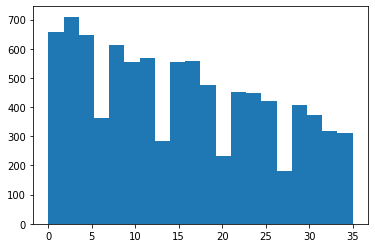

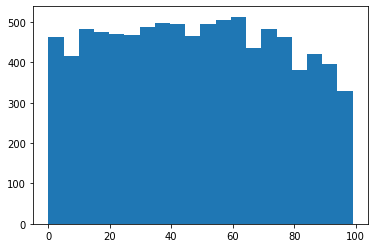

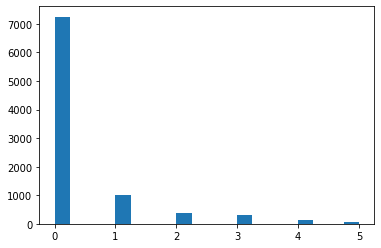

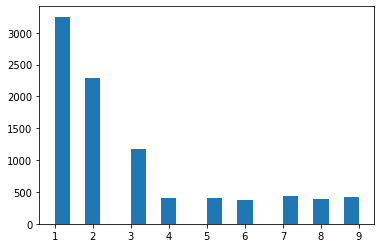

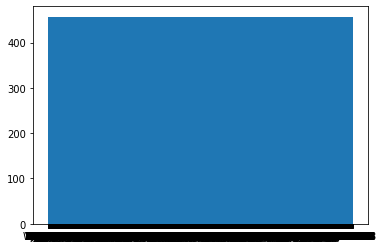

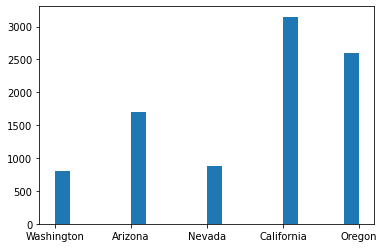

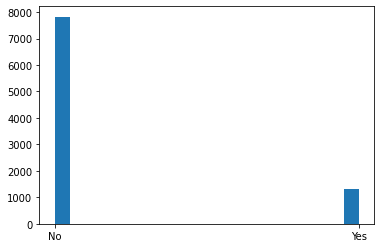

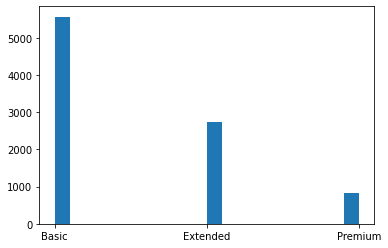

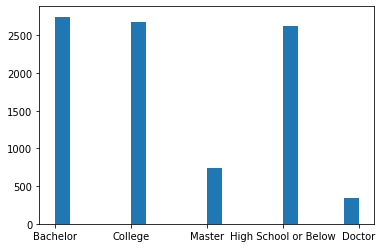

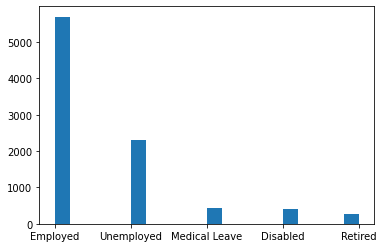

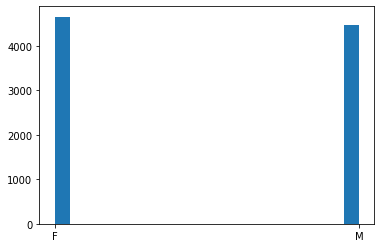

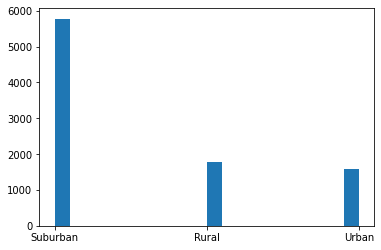

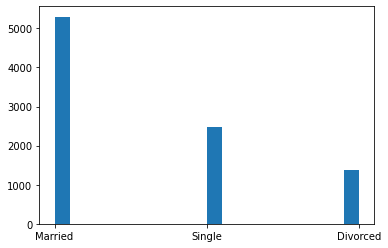

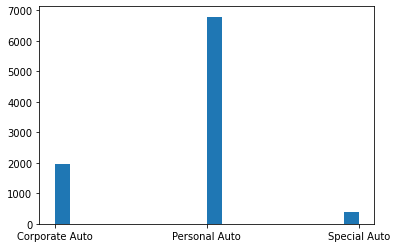

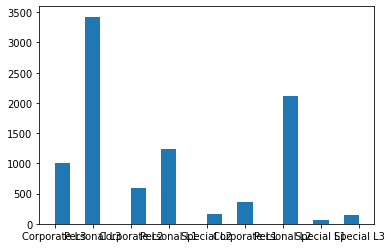

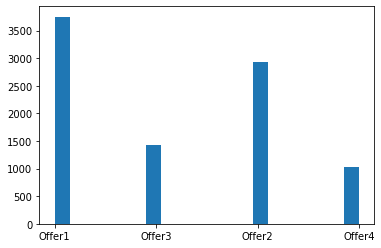

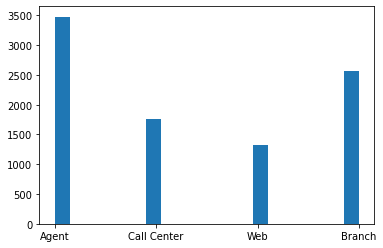

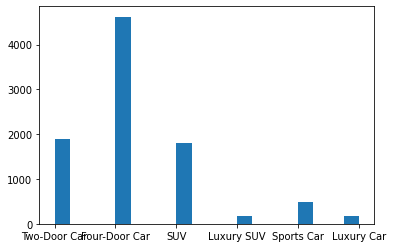

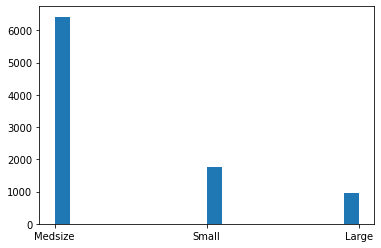

In [81]:
def plot_var(df):
    for i in range(len(col_names_d)):
        plt.hist(df.iloc[:,i],bins=20)
        plt.show()
        #return df.iloc[i]
    #return plt.show()
         
plot_var(discrete_df)


It is more evident from later historgrams how discrete values behave. There are clear gaps between each value that is assigned, and the month values (first two) can be both continuous and discrete depending on the question we are asking so they look more like continuous variables.

Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

4

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'total_claim_amount']

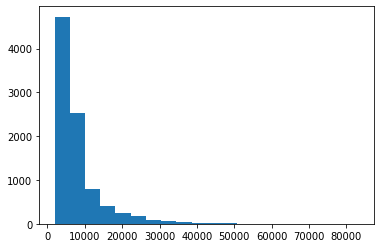

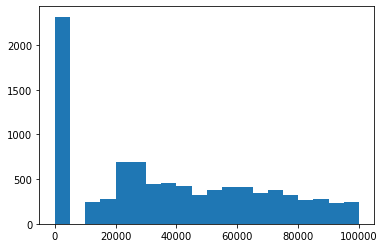

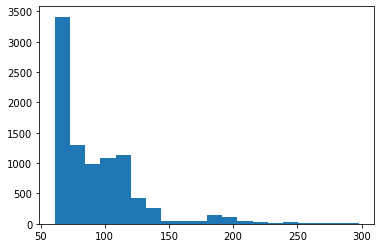

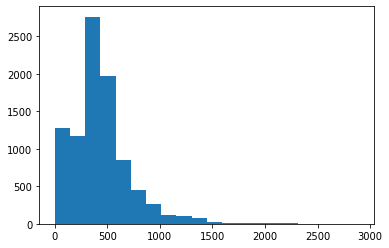

In [84]:
%matplotlib inline
col_names_c = continuous_df.columns.tolist()
len(col_names_c)
col_names_c
def plot_con(df):
    for i in range(len(col_names_c)):
        plt.hist(df.iloc[:,i],bins=20)
        plt.show()
        
plot_con(continuous_df)

Histograms are much better for continuous variable!

6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


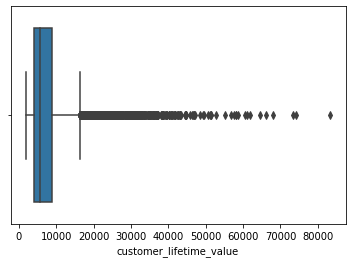

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


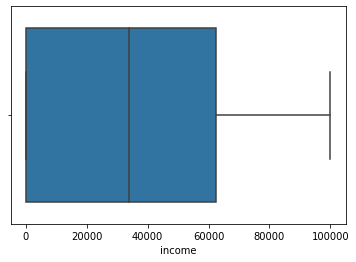

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


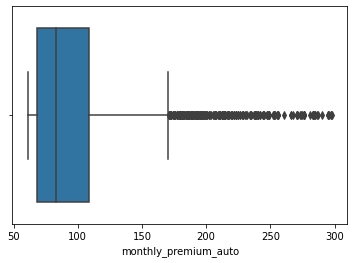

/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


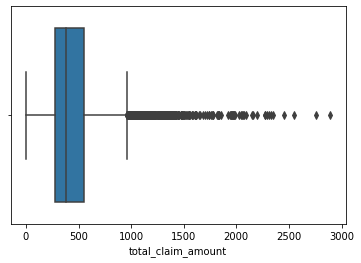

In [85]:
def plot_con_box(df):
    for i in range(len(col_names_c)):
        sns.boxplot(df.iloc[:,i])
        plt.show()
        
plot_con_box(continuous_df)
#sns.boxplot(discrete_df['Months Since Last Claim'])
#plt.show()

From these boxplots, we can easily see which of the variables most likely has outliers. customer_lifetime_value and total_claim_amount are the prime candidates at this point for which we have to remove outliers. But, the distribution of total_claim_amount looks okay from histogram. We can leave that for now.

7. Have you found outliers? If you have, what should we do with them?

<AxesSubplot:>

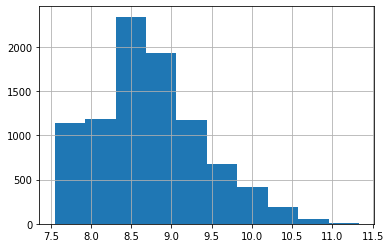

In [87]:
#from above point, I think we should remove the outliers for customer_lifetime_value

#the histogram shows us that there is a heavy skew, we can apply log transformation to make it better.


# We will Log transform the values of the CLV column to reinforce the small 
#values

def log_transfom_clean(row):
    if np.isfinite(row) and row!=0:
        return np.log(row)
    else:
        return row

pd.Series(continuous_df['customer_lifetime_value'].apply(log_transfom_clean)).hist()
plt.show()

Looks much better! 

8. Check nan values per column.

In [88]:
#already done, but doesn't hurt to check for those again as we have been doing some cleaning.

customer_df.isnull().sum() #quite a lot, so maybe we can see the percentages
customer_df.isnull().sum()/len(customer_df) #checking in % format
print("-------")
print("-------")
discrete_df.isnull().sum()/len(discrete_df)
print("-------")
print("-------")
discrete.isnull().sum()/len(discrete)
print("-------")
print("-------")
continuous_df.isnull().sum()/len(continuous_df)

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

-------
-------


months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
customer                         0.0
state                            0.0
response                         0.0
coverage                         0.0
education                        0.0
employmentstatus                 0.0
gender                           0.0
location_code                    0.0
marital_status                   0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
vehicle_class                    0.0
vehicle_size                     0.0
customer                         0.0
state                            0.0
response                         0.0
coverage                         0.0
education                        0.0
employmentstatus                 0.0
gender                           0.0
location_code                    0.0
m

-------
-------


months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
customer                         0.0
state                            0.0
response                         0.0
coverage                         0.0
education                        0.0
employmentstatus                 0.0
gender                           0.0
location_code                    0.0
marital_status                   0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

-------
-------


customer_lifetime_value    0.0
income                     0.0
monthly_premium_auto       0.0
total_claim_amount         0.0
dtype: float64

Looks all good on all of the dataframes I have :)